# Credit Risk - Modeling

In [83]:
# Imports

## Data Manipulation
import numpy as np
import pandas as pd
import pickle

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [56]:
# Package versions
%reload_ext watermark
%watermark -a "Cézar Mendes" --iversions

Author: Cézar Mendes

matplotlib: 3.7.1
sys       : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
seaborn   : 0.12.2
pandas    : 1.5.3
numpy     : 1.24.3



## Loading Data

In [57]:
df = pd.read_csv("../data/credit_risk-processed.csv")

In [58]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,-1.343141,-1.842523,0.191132,-1.536690,0.070196,0,0.10,0,-1.045831,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.343141,-1.831139,-0.698696,-1.225370,-1.256310,1,0.25,0,-1.045831,0,...,0,0,1,1,0,0,0,0,0,0
2,-1.343141,-1.827344,0.487742,-1.412162,1.264051,1,0.16,0,-0.676474,0,...,0,0,1,0,0,0,1,0,0,0
3,-0.558837,-1.796986,1.080960,-1.381030,0.020452,1,0.16,0,-1.045831,1,...,0,0,0,0,1,0,0,0,0,0
4,-0.558837,-1.790155,-1.291914,-1.432917,-1.206566,0,0.14,0,-0.676474,0,...,0,1,0,1,0,0,0,0,0,0


# Correlation

In [59]:
correlation = df.corr()['loan_status'].abs()
sorted_correlations = correlation.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_top_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_top_drop, axis= 1)

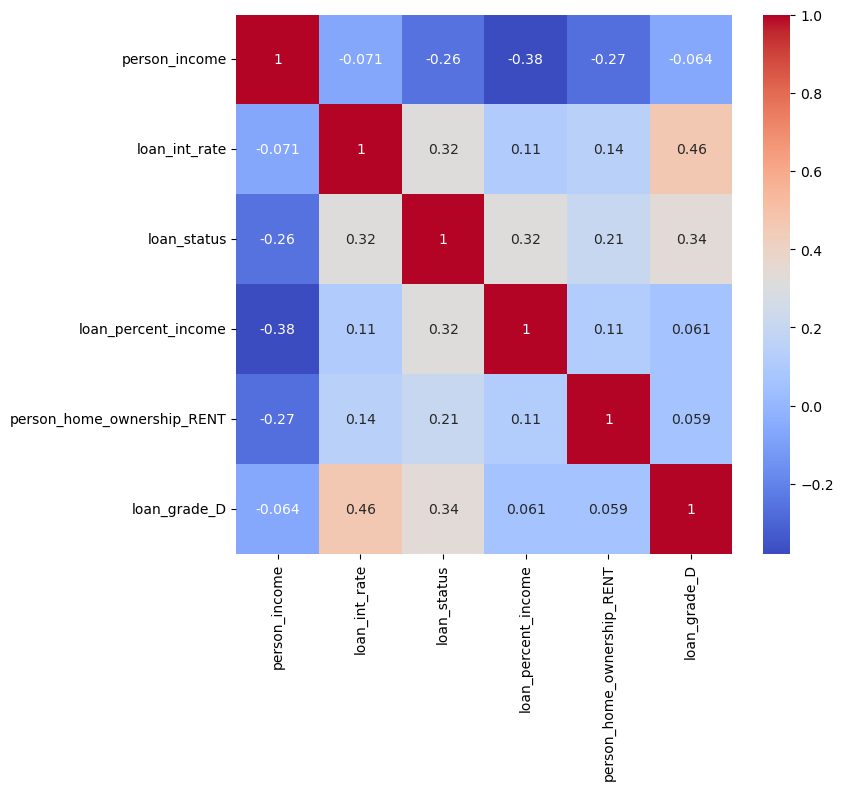

In [60]:
# Correlation
plt.figure(figsize=(8, 7))
sns.heatmap(df_dropped.corr(), annot= True, cmap='coolwarm')
plt.show()

# Train/Test Split

In [61]:
X = df.drop(columns=['loan_status'])
y = df[['loan_status']]

X.shape, y.shape

((25334, 25), (25334, 1))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
X_train.shape

(20267, 25)

In [64]:
X_test.shape

(5067, 25)

In [65]:
X_test.isnull().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
dtype: int64

# Handling with Imbalance Target Feature

### Applying SMOTE

In [66]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the class distribution after resampling
y_train_resampled.value_counts()

loan_status
0              16229
1              16229
dtype: int64

# Random Forest

In [69]:
# Fitting model based on the train data
model = RandomForestClassifier(random_state=42)

In [70]:
# Fitting the model to the training data
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [71]:
# Evaluating the model on the training and test sets
train_score_balanced = model.score(X_train_resampled, y_train_resampled)
test_score_balanced = model.score(X_test, y_test)

train_score_balanced, test_score_balanced

(1.0, 0.9236234458259325)

In [72]:
predictions = model.predict(X_test)

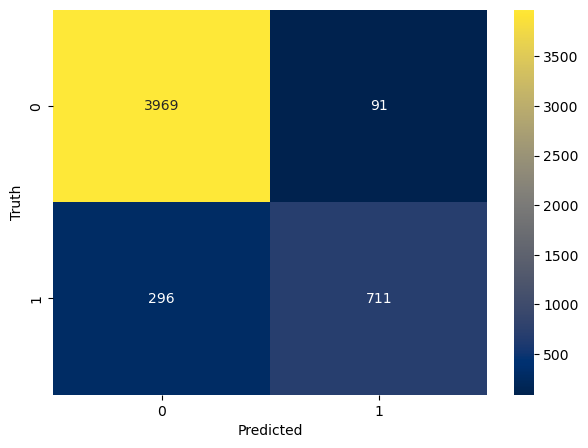

In [73]:
# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(7,5))
           
sns.color_palette("tab10")
sns.heatmap(cm, annot=True, fmt='d', cmap= 'cividis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4060
           1       0.89      0.71      0.79      1007

    accuracy                           0.92      5067
   macro avg       0.91      0.84      0.87      5067
weighted avg       0.92      0.92      0.92      5067



# Hyperparameter Tuning

In [76]:
# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced'],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Randomized search with cross-validation
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                      n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1,
                                      scoring='recall') # Using recall as the scoring metric

# Fitting the random search to the data
rf_random_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='recall', verbose=2)

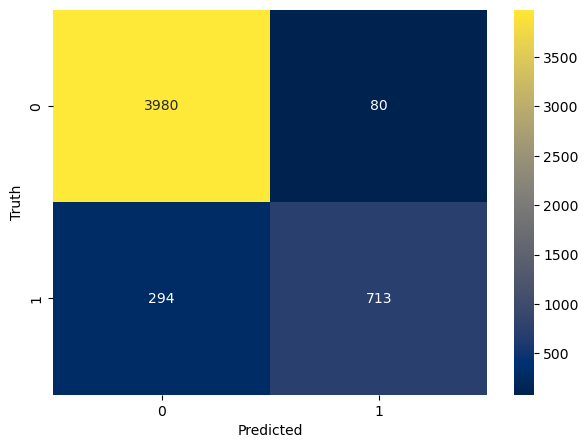

In [78]:
# Extracting the best model
best_rf_model = rf_random_search.best_estimator_

# Making predictions on the test set
best_predictions = best_rf_model.predict(X_test)

# Generating the classification report
best_classification_rep = classification_report(y_test, best_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [80]:
# Creating Report
print(best_classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4060
           1       0.90      0.71      0.79      1007

    accuracy                           0.93      5067
   macro avg       0.92      0.84      0.87      5067
weighted avg       0.92      0.93      0.92      5067



## ROC curve

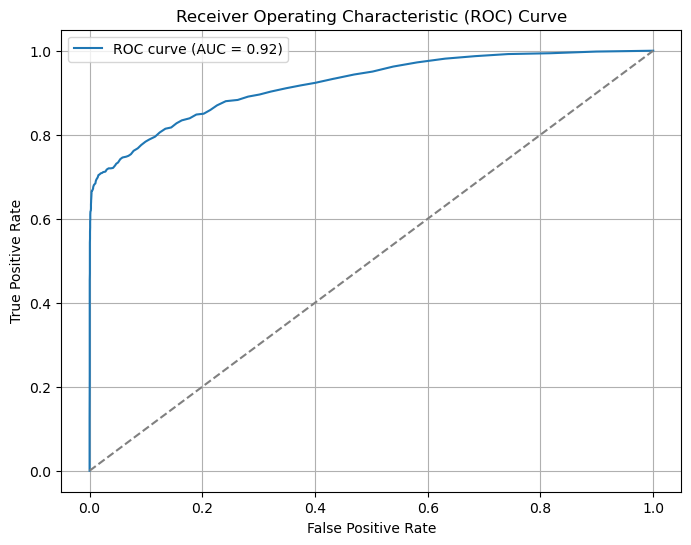

0.920946111211666

In [81]:
# Getting the probability estimates for the positive class (class 1)
probabilities = best_rf_model.predict_proba(X_test)[:, 1]

# Calculating the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculating the AUC
auc_score = roc_auc_score(y_test, probabilities)

# Plotting the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

auc_score


# Saving Model

In [84]:
# saving the model
pickle.dump(best_rf_model, open("../object/model.pkl", "wb"))